In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("merged_data_clean.csv")

In [ ]:
data.head()

,ID,gender,owns_car,owns_property,n_children,annual_income,income_type,education_type,marital_status,housing_type,has_mobile,has_work_phone,has_phone,has_email,occupation,n_fam_members,years_employed,age,label
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,12.443836,32.890411,1
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,12.443836,32.890411,1
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,3.106849,58.832877,1
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,8.358904,52.356164,1
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,8.358904,52.356164,1


Dropping 'ID" because it contains all unique values

In [ ]:
data.drop(columns=['ID'], inplace=True)

# Dropping 'has_mobile' column as all labels are 1s (No meaningful information deduced from this column).

In [ ]:
data['has_mobile'].value_counts()

,count
has_mobile,
1,36455


In [ ]:
data.drop(columns=['has_mobile'], inplace=True)

# Additional features

## Feature 1: "employment_age_ratio"

Description: This feature represents the ratio of the number of years an individual has been employed to their age.

Rationale: The "employment_age_ratio" provides insight into the proportion of an individual's life that has been spent in employment. A higher ratio indicates that the individual has been employed for a significant portion of their life, which may suggest greater work experience and stability. Conversely, a lower ratio may indicate less work experience relative to age, which could be due to various factors such as recent entry into the workforce, periods of unemployment, or other life circumstances. By including this feature, we can better understand the employment history of individuals and its potential impact on financial behavior and creditworthiness, leading to more accurate predictions and insights.

In [ ]:
# create a new column called employment_age_ratio that calculates years_employed, age ratio
data['employment_age_ratio'] = data['years_employed'] / data['age']

count    36455.000000
mean         0.145752
std          0.140628
min          0.000000
25%          0.028467
50%          0.109497
75%          0.219076
max          0.694306
Name: employment_age_ratio, dtype: float64


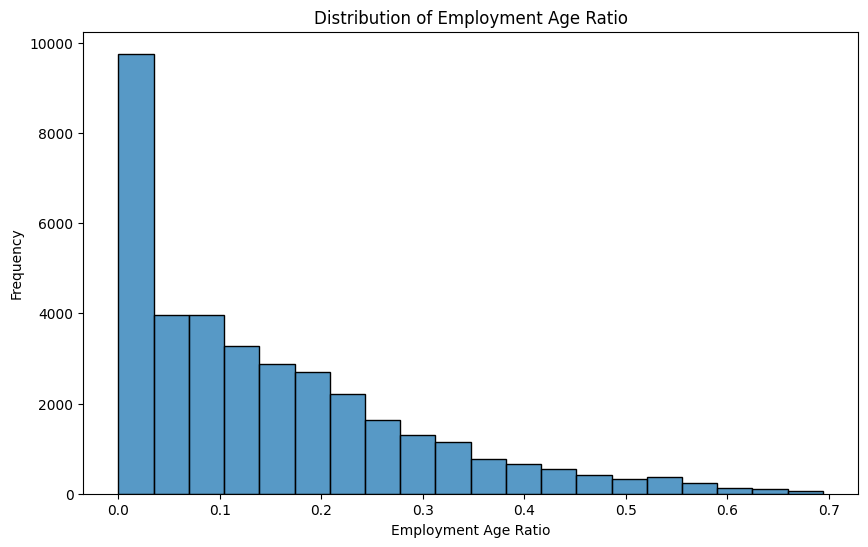

In [ ]:
print(data['employment_age_ratio'].describe())

# visulize the distribution of employment_age_ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['employment_age_ratio'], bins=20)
plt.xlabel('Employment Age Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Employment Age Ratio')
plt.show()

## Feature 2: "single_parent"

Description: This feature indicates whether an individual is a single parent. It is a binary feature where:
- 1: The individual is a single parent, defined as either:
    - Marital status is 'Single / not married' and the number of children (`n_children`) is greater than 0.
    - Marital status is 'Widow' and the number of children (`n_children`) is greater than 0.
- 0: The individual is not a single parent.

Rationale: Identifying single parents is crucial for understanding the financial and social dynamics of the dataset. Single parents status might indicate
higher financial stress. By including this feature, we can better analyze and model the data to account for these differences, potentially leading to more
accurate predictions and insights.

In [ ]:
print(data['marital_status'].value_counts())

# create a new column called single_parent, which is 1 if marital_status = ('Single / not married' and n_children > 0) or ('Widow' and n_children > 0), else 0
data['single_parent'] = np.where(((data['marital_status'] == 'Single / not married') & (data['n_children'] > 0))
                                 | ((data['marital_status'] == 'Widow') & (data['n_children'] > 0)), 1, 0)

marital_status
Married                 25046
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: count, dtype: int64


In [ ]:
print(data['single_parent'].value_counts())

single_parent
0    35617
1      838
Name: count, dtype: int64


## Feature 3: "communication_score"

Description: This feature represents the average communication accessibility of an individual. It is calculated using the following binary features:
- has_work_phone: Indicates if the individual has a work phone.
- has_phone: Indicates if the individual has a phone.
- has_email: Indicates if the individual has an email address.

Rationale: The "communication_score" feature provides a comprehensive measure of an individual's accessibility through various communication channels. Higher
scores indicate better accessibility, which can be crucial for understanding the individual's connectivity and potential responsiveness. This feature can help
in analyzing the impact of communication accessibility on financial behavior and creditworthiness, leading to more accurate predictions and insights.

In [ ]:
print(data['has_work_phone'].value_counts())
print(data['has_phone'].value_counts())
print(data['has_email'].value_counts())

has_work_phone
0    28233
1     8222
Name: count, dtype: int64
has_phone
0    25707
1    10748
Name: count, dtype: int64
has_email
0    33184
1     3271
Name: count, dtype: int64


In [ ]:
# create a new column called communication_score
data['communication_score'] = data['has_work_phone'] * 0.5 + data['has_phone'] * 0.3 + data['has_email'] * 0.2
print(data['communication_score'].value_counts())

communication_score
0.0    20042
0.3     5506
0.8     4228
0.5     4061
0.2     2032
1.0      361
0.7      225
Name: count, dtype: int64


In [ ]:
data.head()

,gender,owns_car,owns_property,n_children,annual_income,income_type,education_type,marital_status,housing_type,has_work_phone,has_phone,has_email,occupation,n_fam_members,years_employed,age,label,employment_age_ratio,single_parent,communication_score
0,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2.0,12.443836,32.890411,1,0.378342,0,0.5
1,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2.0,12.443836,32.890411,1,0.378342,0,0.5
2,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,3.106849,58.832877,1,0.052808,0,0.0
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,8.358904,52.356164,1,0.159655,0,0.5
4,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,8.358904,52.356164,1,0.159655,0,0.5


In [ ]:
data.columns

Index(['gender', 'owns_car', 'owns_property', 'n_children', 'annual_income',
       'income_type', 'education_type', 'marital_status', 'housing_type',
       'has_work_phone', 'has_phone', 'has_email', 'occupation',
       'n_fam_members', 'years_employed', 'age', 'label',
       'employment_age_ratio', 'single_parent', 'communication_score'],
      dtype='object')

In [ ]:
data.to_csv("data_with_FE.csv", index=False)